# Cotton Disease: Custom CNN & Transfer Learning

<img src="https://img.freepik.com/free-photo/row-growing-green-cotton-field-india_54391-2406.jpg?size=626&ext=jpg&ga=GA1.2.1623233742.1618790400" align=middle>

## Problem

Given the huge areas used for cotton production, **how could we best detect disease present in the plants with minimun human effort?**

## Proposed Solution

First, we would create a custom **Convolutional Neural Network (CNN)** and see how much precision could we get from it. Later, we would take advantage of the **VGG16** model through **transfer learning** to find out if the accuracy improves in a considerable way to decide wich model is the most appropiate for this task.

## Importing Libraries and Packages

### Data Processing and Visualization
* Random
* Numpy
* Pandas
* Matplotlib

### Deep Learning
* Tensorflow
* Keras

In [1]:
#Libraries
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  # This is added back by InteractiveShellApp.init_path()


In [2]:
#Setting a specific random seed
tf.random.set_seed(1)

## Data Preparation for the Custom Model

In [3]:
#Data Generation
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                        shear_range = 0.2,
                                        zoom_range = 0.5,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        width_shift_range=0.2,
                                        brightness_range=[0.2,1.2]
                                        )
valid_datagen = ImageDataGenerator(rescale = 1.0/255)

test_datagen = ImageDataGenerator(rescale = 1.0/255)


train_data = train_datagen.flow_from_directory('../input/cotton-disease-dataset/Cotton Disease/train',
                                                    target_size = (250,250),
                                                    batch_size = 64,
                                                    class_mode = 'categorical')
val_data = valid_datagen.flow_from_directory('../input/cotton-disease-dataset/Cotton Disease/val',
                                                  target_size = (250,250),
                                                    batch_size = 64,
                                                    class_mode = 'categorical')
test_data = test_datagen.flow_from_directory('../input/cotton-disease-dataset/Cotton Disease/test',
                                                  target_size = (250,250),
                                                    batch_size = 64,
                                                    class_mode = 'categorical')


Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


## Custom CNN Model Architecture

In [4]:
#Custom CNN Model
model = keras.Sequential([
        #inputLayer
        layers.InputLayer(input_shape=(250,250,3)),     

        #Data Augmentation
        #preprocessing.RandomContrast(factor=0.10),
        #preprocessing.RandomRotation(factor=0.10),

        #Base        
        #layers.BatchNormalization(renorm=True),
        layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPool2D(),

        
        #layers.BatchNormalization(renorm=True),
        layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPool2D(),

        
        #layers.BatchNormalization(renorm=True),
        layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
        layers.Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'),
        layers.MaxPool2D(),

        # Head
        #layers.BatchNormalization(renorm=True),
        layers.Flatten(),
        layers.Dense(8, activation='relu'),
        layers.Dense(4, activation='softmax'),
                     
])

## Custom CNN Model Summary

In [5]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 62, 62, 256)       590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 256)       0

## Compilation of Custom CNN

In [6]:
#Compilation
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [7]:
## Callbacks
early_stopping=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=2
)

#Training
history=model.fit(
    train_data,
    validation_data=val_data,
    callbacks=[early_stopping],
    epochs=50,
    verbose=2
)

Epoch 1/50
31/31 - 66s - loss: 1.4545 - accuracy: 0.4059 - val_loss: 1.3394 - val_accuracy: 0.3083
Epoch 2/50
31/31 - 43s - loss: 1.1900 - accuracy: 0.4726 - val_loss: 1.1683 - val_accuracy: 0.4387
Epoch 3/50
31/31 - 44s - loss: 1.1843 - accuracy: 0.4813 - val_loss: 1.1442 - val_accuracy: 0.4427
Epoch 4/50
31/31 - 42s - loss: 1.0685 - accuracy: 0.5351 - val_loss: 1.1141 - val_accuracy: 0.5217
Epoch 5/50
31/31 - 43s - loss: 0.9673 - accuracy: 0.6002 - val_loss: 0.8969 - val_accuracy: 0.5613
Epoch 6/50
31/31 - 44s - loss: 0.8841 - accuracy: 0.6392 - val_loss: 0.9197 - val_accuracy: 0.6759
Epoch 7/50
31/31 - 44s - loss: 0.8759 - accuracy: 0.6458 - val_loss: 0.8097 - val_accuracy: 0.6640
Epoch 8/50
31/31 - 43s - loss: 0.8210 - accuracy: 0.6509 - val_loss: 0.7878 - val_accuracy: 0.6522
Epoch 9/50
31/31 - 42s - loss: 0.7709 - accuracy: 0.6745 - val_loss: 0.8409 - val_accuracy: 0.6877
Epoch 10/50
31/31 - 45s - loss: 0.7397 - accuracy: 0.7094 - val_loss: 0.7237 - val_accuracy: 0.7154
Epoch 11/

## Plotting the Loss and Accuracy for the Training and Validation Data

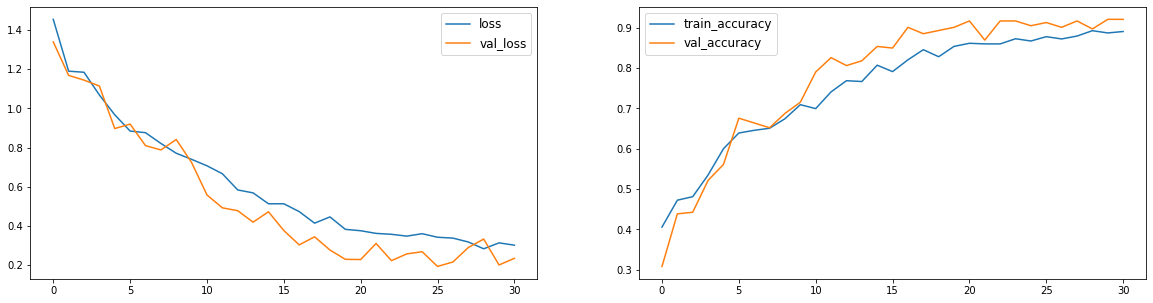

In [8]:
#Plotting Loss and Accuracy
history_df=pd.DataFrame(history.history)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend(fontsize=12)

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend(fontsize=12)

## Evaluation of Custom CNN Model

### Precision: **0.9245**

In [9]:
#Evaluation
model.evaluate(test_data,verbose=2)

2/2 - 7s - loss: 0.3349 - accuracy: 0.8962


[0.3349030315876007, 0.8962264060974121]

## Transfer Learning

Setting up the image size for our samples and printing a summary of VGG16 sans its top layer.

In [10]:
#Transfer Learning
IMAGE_SIZE = [250, 250]
vgg16 = tf.keras.applications.vgg16.VGG16(input_shape = IMAGE_SIZE + [3],include_top = False)
print(type(vgg16))
vgg16.summary()

58892288/58889256 [==============================] - 1s 0us/step
<class 'tensorflow.python.keras.engine.functional.Functional'>
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 250, 250, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 250, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 125, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 125, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 125, 128)     147584    

We won't be training the feature extraction layers of VGG16 again. So, let's set them up as follows:

In [11]:
for layer in vgg16.layers:
    layer.trainable = False
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 250, 250, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 250, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 125, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 125, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 125, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 62, 62, 128)       0     

In [12]:
from glob import glob
folders=folders = glob('/kaggle/input/cotton-disease-dataset/Cotton Disease/train/*')

## Setting our Transfer Learning Model

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
x = Flatten()(vgg16.output)
prediction = Dense(len(folders), activation='softmax')(x)

modelvg=Model(inputs=vgg16.input,outputs=prediction)
#for layer in vgg16.layers[0:-1]:
#    modelvg.add(layer)
modelvg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 250, 250, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 250, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 125, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 125, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 125, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 62, 62, 128)       0     

## Data Preparation for the Train, Validation and Test batches

In [14]:
#Preprocessing
#preprocess_input = tf.keras.applications.vgg16.preprocess_input
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                        shear_range = 0.2,
                                        zoom_range = 0.5,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        width_shift_range=0.2,
                                        brightness_range=[0.2,1.2]
                                        )
valid_datagen = ImageDataGenerator(rescale = 1.0/255)

test_datagen = ImageDataGenerator(rescale = 1.0/255)

train_data = train_datagen.flow_from_directory('../input/cotton-disease-dataset/Cotton Disease/train',
                                                    target_size = (250,250),
                                                    batch_size = 64,
                                                    class_mode = 'categorical')
val_data = valid_datagen.flow_from_directory('../input/cotton-disease-dataset/Cotton Disease/val',
                                                  target_size = (250,250),
                                                    batch_size = 64,
                                                    class_mode = 'categorical')
test_data = test_datagen.flow_from_directory('../input/cotton-disease-dataset/Cotton Disease/test',
                                                  target_size = (250,250),
                                                    batch_size = 64,
                                                    class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


## Setting the Optimizer, Loss, and Metrics for Compilation

In [15]:
#Compilation
modelvg.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

## Training the Transfer Learning Model

In [16]:
## Callbacks
early_stopping=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=2
)

#Training
history=modelvg.fit(
    train_data,
    validation_data=val_data,
    callbacks=[early_stopping],
    shuffle=True,
    epochs=30,
    verbose=2
)

Epoch 1/30
31/31 - 49s - loss: 1.2387 - accuracy: 0.5566 - val_loss: 0.5938 - val_accuracy: 0.7866
Epoch 2/30
31/31 - 45s - loss: 0.5936 - accuracy: 0.7693 - val_loss: 0.3427 - val_accuracy: 0.8617
Epoch 3/30
31/31 - 46s - loss: 0.5084 - accuracy: 0.8073 - val_loss: 0.2640 - val_accuracy: 0.9012
Epoch 4/30
31/31 - 44s - loss: 0.4519 - accuracy: 0.8303 - val_loss: 0.2343 - val_accuracy: 0.9051
Epoch 5/30
31/31 - 46s - loss: 0.4202 - accuracy: 0.8447 - val_loss: 0.3101 - val_accuracy: 0.8933
Epoch 6/30
31/31 - 44s - loss: 0.4150 - accuracy: 0.8488 - val_loss: 0.2406 - val_accuracy: 0.9091
Epoch 7/30
31/31 - 45s - loss: 0.3822 - accuracy: 0.8631 - val_loss: 0.2162 - val_accuracy: 0.9209
Epoch 8/30
31/31 - 45s - loss: 0.3637 - accuracy: 0.8529 - val_loss: 0.3133 - val_accuracy: 0.8814
Epoch 9/30
31/31 - 44s - loss: 0.3822 - accuracy: 0.8514 - val_loss: 0.2630 - val_accuracy: 0.8972
Epoch 10/30
31/31 - 45s - loss: 0.3507 - accuracy: 0.8780 - val_loss: 0.2209 - val_accuracy: 0.9170
Epoch 11/

## Plotting the Loss and Accuracy for the Traning and Validation Data

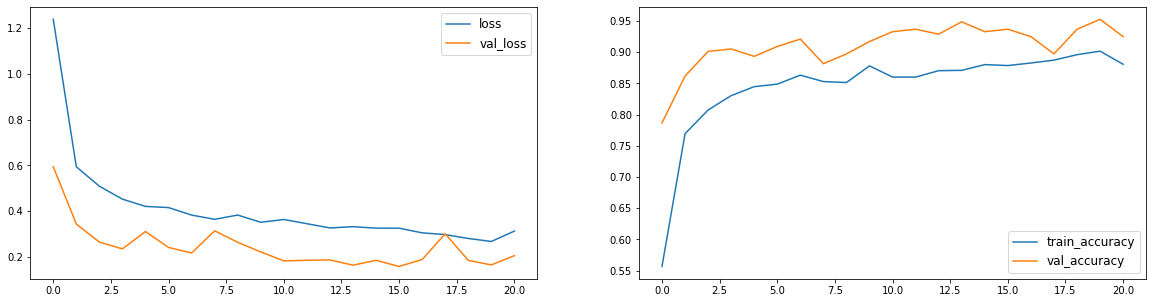

In [17]:
#Plotting Loss and Accuracy
history_df=pd.DataFrame(history.history)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend(fontsize=12)

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend(fontsize=12)

## Evaluation

### Precision: **0.9434**

In [18]:
#Evaluation
modelvg.evaluate(test_data,verbose=2)

2/2 - 6s - loss: 0.1291 - accuracy: 0.9434


[0.12911680340766907, 0.9433962106704712]